<a href="https://colab.research.google.com/github/fkivuti/wk6-The-Linear-Regression-Model-Project/blob/main/Copy_of_Copy_of_Project_Notebook_The_Linear_Regression_ModelProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Notebook: The Linear Regression Model

## 1. Introduction

We started by building intuition for model based learning, explored how the linear regression model worked, understood how the two different approaches to model fitting worked, and some techniques for cleaning, transforming, and selecting features. In this project, you can practice what you learned by exploring ways to improve the models we built.

You'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

Let's start by setting up a pipeline of functions that will let us quickly iterate on different models.

**Tasks**

1. Import pandas, matplotlib, and numpy into the environment. Import the classes you need from scikit-learn as well.
2. Read `AmesHousing.tsv` () into a pandas data frame.
3. For the following functions, we recommend creating them in the first few cells in the notebook. This way, you can add cells to the end of the notebook to do experiments and update the functions in these cells.
* Create a function named `transform_features()` that, for now, just returns the train data frame.
* Create a function named `select_features()` that, for now, just returns the Gr Liv Area and SalePrice columns from the train data frame.
* Create a function named `train_and_test()` that, for now:

1. Selects the first 1460 rows from from data and assign to train.
2. Selects the remaining rows from data and assign to test.
3. Trains a model using all numerical columns except the SalePrice column (the target column) from the data frame returned from `select_features()`
4. Tests the model on the test set and returns the `RMSE` value.

In [ ]:
# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('https://bit.ly/3boZCX4' , delimiter= '\t')
data.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
data.shape

(2930, 82)

In [ ]:
pd.set_option('display.max_rows', None)
data.dtypes


Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [ ]:
# function that returns train data
def transform_features():
  return train

# transform_features()

# function that returns Gr Liv Area & SalePrice from the train data frame
def select_features():
  return train.loc[: , ['Gr Liv Area', 'SalePrice']]

# select_features()

# a function named train_and_test
# def train_and_test():

# train_and_test()

In [ ]:
# apportioning rows between train and test dataframes

train = data[0:1460]
test = data[1460:]


In [ ]:
# assign the function select_features() to X variable
X = select_features()
X.head()

,Gr Liv Area,SalePrice
0,1656,215000
1,896,105000
2,1329,172000
3,2110,244000
4,1629,189900


In [ ]:
X.describe()

,Gr Liv Area,SalePrice
count,1460.000000,1460.000000
mean,1490.942466,179607.671918
std,468.812477,78382.176457
min,407.000000,12789.000000
25%,1141.750000,128987.500000
50%,1454.000000,160000.000000
75%,1732.250000,213062.500000
max,3493.000000,615000.000000


In [ ]:
# import Linear Regression Model from Sklean linear model and mean_squared_error from metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# initalize the model
lr = LinearRegression()

# train model using Gr Liv Area & SalePrice  as train and target data respectively
lr.fit(X[['Gr Liv Area']], X['SalePrice'])

test_predict = lr.predict(test[['Gr Liv Area']])

mse = mean_squared_error(test[['SalePrice']], test_predict)
rmse = mse**0.5

print("mse : ", mse)
print("rmse : ", rmse)



mse :  3259068472.1879897
rmse :  57088.25161263909


RMES is higher than 10% of the SalesPrice mean

## 2. Feature Engineering

Let's now start removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns. Update `transform_features()` so that any column from the data frame with more than 25% (or another cutoff value) missing values is dropped. You also need to remove any columns that leak information about the sale (e.g. like the year the sale happened). In general, the goal of this function is to:

* remove features that we don't want to use in the model, just based on the number of missing values or data leakage.
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc).
* create new features by combining other features.

Next, you need to get more familiar with the remaining columns by reading the data documentation for each column, determining what transformations are necessary (if any), and more. As we mentioned earlier, succeeding in predictive modeling (and competitions like Kaggle) is highly dependent on the quality of features the model has. Libraries like scikit-learn have made it quick and easy to simply try and tweak many different models, but cleaning, selecting, and transforming features are still more of an art that requires a bit of human ingenuity.

**Tasks**

1. As we mentioned earlier, we recommend adding some cells to explore and experiment with different features (before rewriting these functions).

2. The `transform_features()` function shouldn't modify the train data frame and instead return a new one entirely. This way, we can keep using train in the experimentation cells.

3. Which columns contain less than 5% missing values?
* For numerical columns that meet this criteria, let's fill in the missing values using the most popular value for that column.

4. What new features can we create, that better capture the information in some of the features?
* An example of this would be the `years_until_remod` feature we created in the last lesson.

5. Which columns need to be dropped for other reasons?
* Which columns aren't useful for machine learning?
* Which columns leak data about the final sale?

In [ ]:
# Your code goes here


In [ ]:
transform_features().shape

(1460, 82)

In [ ]:
# select all fields with integer or float datatype
numerical_train = transform_features().select_dtypes(include=['int', 'float']) # select columns with int or float dtype 

# drop unwanted columns
numerical_train = numerical_train.drop(columns=['Order','PID', 'Year Built','Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)# drop unwanted columns

# Count number of missing values per columns and select columns where missing values is below 5% i.e. have a count of not more than 73 missing values.
pd.set_option('display.max_rows', None)
missing_values_threshold = 0.05 * 1460
null_series= numerical_train.isnull().sum().sort_values(ascending=False)
# null_series= (numerical_train.isnull().sum() / numerical_train.isnull().count()).sort_values(ascending=False)
good_cols = null_series[null_series < missing_values_threshold]

subset_train = numerical_train[good_cols.index]
subset_train['years_until_remod'] = transform_features()['Year Remod/Add'] - transform_features()['Year Built']

# populate null values in each column in the subset_train dataframe with mode value for the column.
for column in subset_train:
    if subset_train[column].isnull().any():
        subset_train[column]=subset_train[column].fillna(subset_train[column].mode()[0])

subset_train.isnull().sum()
# print(len(good_cols))
subset_train.head()

,Mas Vnr Area,Bsmt Half Bath,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Misc Val,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,SalePrice,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,MS SubClass,years_until_remod
0,112.0,0.0,639.0,0.0,441.0,1080.0,1.0,0,31770,6,5,1656,0,0,1656,215000,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,20,0
1,0.0,0.0,468.0,144.0,270.0,882.0,0.0,0,11622,5,6,896,0,0,896,105000,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,20,0
2,108.0,0.0,923.0,0.0,406.0,1329.0,0.0,12500,14267,6,6,1329,0,0,1329,172000,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,20,0
3,0.0,0.0,1065.0,0.0,1045.0,2110.0,1.0,0,11160,7,5,2110,0,0,2110,244000,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,20,0
4,0.0,0.0,791.0,0.0,137.0,928.0,0.0,0,13830,5,5,928,701,0,1629,189900,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,60,1


In [ ]:
subset_train.shape

(1460, 32)

In [ ]:
# select columns that have a datatype of object

text_train = transform_features().select_dtypes(include=['object']) # select columns with object dtype 
text_train.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [ ]:
# check shape of the text_train dataframe
text_train.shape

# chekf for null values
text_null_series=text_train.isnull().sum().sort_values()
text_null_series

# filter out columns with more than 5% missing values
text_good_cols = text_null_series[text_null_series < missing_values_threshold]
subset_text_train = text_train[text_good_cols.index]
subset_text_train.shape

# populate null values in each column in the subset_text_train dataframe with mode value for the column.
for column in subset_text_train:
    if subset_text_train[column].isnull().any():
        subset_text_train[column]=subset_text_train[column].fillna(subset_text_train[column].mode()[0])
subset_text_train.isnull().sum()

subset_text_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,MS Zoning,Paved Drive,Functional,Kitchen Qual,Electrical,Central Air,Heating QC,Heating,Sale Type,Foundation,Exter Cond,Exter Qual,Exterior 2nd,Exterior 1st,Sale Condition,Roof Style,Street,Lot Shape,Land Contour,Roof Matl,Lot Config,Land Slope,Utilities,House Style,Neighborhood,Condition 1,Condition 2,Bldg Type,Mas Vnr Type,Bsmt Qual,BsmtFin Type 1,Bsmt Cond,Bsmt Exposure,BsmtFin Type 2
0,RL,P,Typ,TA,SBrkr,Y,Fa,GasA,WD,CBlock,TA,TA,Plywood,BrkFace,Normal,Hip,Pave,IR1,Lvl,CompShg,Corner,Gtl,AllPub,1Story,NAmes,Norm,Norm,1Fam,Stone,TA,BLQ,Gd,Gd,Unf
1,RH,Y,Typ,TA,SBrkr,Y,TA,GasA,WD,CBlock,TA,TA,VinylSd,VinylSd,Normal,Gable,Pave,Reg,Lvl,CompShg,Inside,Gtl,AllPub,1Story,NAmes,Feedr,Norm,1Fam,None,TA,Rec,TA,No,LwQ
2,RL,Y,Typ,Gd,SBrkr,Y,TA,GasA,WD,CBlock,TA,TA,Wd Sdng,Wd Sdng,Normal,Hip,Pave,IR1,Lvl,CompShg,Corner,Gtl,AllPub,1Story,NAmes,Norm,Norm,1Fam,BrkFace,TA,ALQ,TA,No,Unf
3,RL,Y,Typ,Ex,SBrkr,Y,Ex,GasA,WD,CBlock,TA,Gd,BrkFace,BrkFace,Normal,Hip,Pave,Reg,Lvl,CompShg,Corner,Gtl,AllPub,1Story,NAmes,Norm,Norm,1Fam,None,TA,ALQ,TA,No,Unf
4,RL,Y,Typ,TA,SBrkr,Y,Gd,GasA,WD,PConc,TA,TA,VinylSd,VinylSd,Normal,Gable,Pave,IR1,Lvl,CompShg,Inside,Gtl,AllPub,2Story,Gilbert,Norm,Norm,1Fam,None,Gd,GLQ,TA,No,Unf


In [ ]:

subset_text_train.shape

(1460, 34)

## 3. Feature Selection

Now that we have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection for numerical features.

**Tasks**

1. Generate a correlation heatmap matrix of the numerical features in the training data set.
* Which features correlate strongly with our target column, `SalePrice`?
* Calculate the correlation coefficients for the columns that seem to correlate well with `SalePrice`. Because we have a pipeline in place, it's easy to try different features and see which features result in a better cross validation score.

2. Which columns in the data frame should be converted to the categorical data type? All of the columns that can be categorized as nominal variables are candidates for being converted to categorical. Here are some other things you should think about:
* If a categorical column has hundreds of unique values (or categories), should you keep it? When you dummy code this column, hundreds of columns will need to be added back to the data frame.
* Which categorical columns have a few unique values but more than 95% of the values in the column belong to a specific category? This would be similar to a low variance numerical feature (no variability in the data for the model to capture).

3. Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?

4. What are some ways we can explore which categorical columns "correlate" well with `SalePrice`?

5. Update the logic for the `select_features()` function. This function should take in the new, modified train and test data frames that were returned from `transform_features()`.

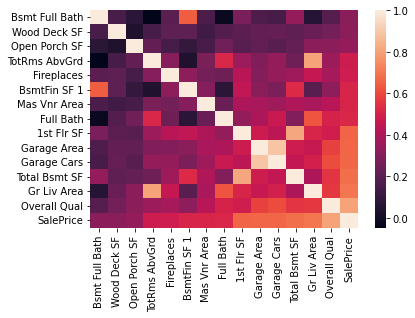

In [ ]:
# Your code goes here
# define a correlation matrix of the train_subset and view the correlation matrix as a heat matrix
corrmat = subset_train.corr()

# check features that correlate strongly with SalePrice and sort the values
sorted_corrs = corrmat['SalePrice'].abs().sort_values()

# select columns that correlate well with SalePrice and where this is greater that 0.3
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = subset_train[strong_corrs.index].corr()
sns.heatmap(corrmat)



In [ ]:
sorted_corrs

In [ ]:
# check for number of unique objects in the numerical columns
numerical_cols= subset_train[strong_corrs.index].columns
numerical_cols
for col in numerical_cols:
    print(col+":", len(subset_train[col].unique()))

for col in numerical_cols:
    subset_train[col] = subset_train[col].astype('category')

Bsmt Full Bath: 4
Wood Deck SF: 272
Open Porch SF: 195
TotRms AbvGrd: 11
Fireplaces: 4
BsmtFin SF 1: 668
Mas Vnr Area: 304
Full Bath: 5
1st Flr SF: 764
Garage Area: 442
Garage Cars: 6
Total Bsmt SF: 728
Gr Liv Area: 880
Overall Qual: 10
SalePrice: 644


In [ ]:
# for columns that have low unique values, check on the distribution of the unique values
bsmt = subset_train['Bsmt Full Bath'].unique()
print("Bsmt Full Bath :", bsmt)
print(subset_train['Bsmt Full Bath'].cat.codes.value_counts())

TotRms = subset_train['TotRms AbvGrd'].unique()
print("TotRms AbvGrd :", TotRms)
print(subset_train['TotRms AbvGrd'].cat.codes.value_counts())

Firep = subset_train['Fireplaces'].unique()
print("Fireplaces :", Firep)
print(subset_train['Fireplaces'].cat.codes.value_counts())

FullBath = subset_train['Full Bath'].unique()
print("Full Bath :", FullBath)
print(subset_train['Full Bath'].cat.codes.value_counts())

garage = subset_train['Garage Cars'].unique()
print("Garage Cars :", garage)
print(subset_train['Garage Cars'].cat.codes.value_counts())

OverallQ = subset_train['Overall Qual'].unique()
print("Overall Qual :", OverallQ)
print(subset_train['Overall Qual'].cat.codes.value_counts())

Bsmt Full Bath : [1.0, 0.0, 2.0, 3.0]
Categories (4, float64): [1.0, 0.0, 2.0, 3.0]
0    829
1    610
2     19
3      2
dtype: int64
TotRms AbvGrd : [7, 5, 6, 8, 4, ..., 10, 11, 9, 3, 13]
Length: 11
Categories (11, int64): [7, 5, 6, 8, ..., 11, 9, 3, 13]
3     411
4     330
2     307
5     168
1     106
6      66
7      37
8      14
9      10
0      10
10      1
dtype: int64
Fireplaces : [2, 0, 1, 3]
Categories (4, int64): [2, 0, 1, 3]
0    717
1    621
2    118
3      4
dtype: int64
Full Bath : [1, 2, 3, 0, 4]
Categories (5, int64): [1, 2, 3, 0, 4]
2    780
1    650
3     20
0      6
4      4
dtype: int64
Garage Cars : [2.0, 1.0, 3.0, 0.0, 4.0, 5.0]
Categories (6, float64): [2.0, 1.0, 3.0, 0.0, 4.0, 5.0]
2    815
1    386
3    175
0     74
4      9
5      1
dtype: int64
Overall Qual : [6, 5, 7, 8, 9, 4, 3, 2, 10, 1]
Categories (10, int64): [6, 5, 7, 8, ..., 3, 2, 10, 1]
4    408
5    376
6    303
7    164
3    104
8     62
2     18
9     14
1     10
0      1
dtype: int64


None of the unique elements in the columns hold above 60% of the data

In [ ]:
# new train dataframe based on columns with strong correlation with SalePrice
subset_train = subset_train[numerical_cols]
subset_train.head()

,Bsmt Full Bath,Wood Deck SF,Open Porch SF,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Mas Vnr Area,Full Bath,1st Flr SF,Garage Area,Garage Cars,Total Bsmt SF,Gr Liv Area,Overall Qual,SalePrice
0,1.0,210,62,7,2,639.0,112.0,1,1656,528.0,2.0,1080.0,1656,6,215000
1,0.0,140,0,5,0,468.0,0.0,1,896,730.0,1.0,882.0,896,5,105000
2,0.0,393,36,6,0,923.0,108.0,1,1329,312.0,1.0,1329.0,1329,6,172000
3,1.0,0,0,8,2,1065.0,0.0,2,2110,522.0,2.0,2110.0,2110,7,244000
4,0.0,212,34,6,1,791.0,0.0,2,928,482.0,2.0,928.0,1629,5,189900


We have our preferred 15 numerical columns

In [ ]:
print(train.var().sort_values)

<bound method Series.sort_values of Series([], dtype: float64)>


In [ ]:
# get the columns from the text columns dataset
text_train_cols = subset_text_train.columns
text_train_cols

# check for number of unique objects in the text columns
for col in text_train_cols:
    print(col+":", len(subset_text_train[col].unique()))
    text_train[col] = subset_text_train[col].astype('category')

MS Zoning: 6
Paved Drive: 3
Functional: 7
Kitchen Qual: 5
Electrical: 4
Central Air: 2
Heating QC: 4
Heating: 6
Sale Type: 9
Foundation: 6
Exter Cond: 5
Exter Qual: 4
Exterior 2nd: 16
Exterior 1st: 14
Sale Condition: 5
Roof Style: 6
Street: 2
Lot Shape: 4
Land Contour: 4
Roof Matl: 5
Lot Config: 5
Land Slope: 3
Utilities: 3
House Style: 8
Neighborhood: 26
Condition 1: 9
Condition 2: 6
Bldg Type: 5
Mas Vnr Type: 4
Bsmt Qual: 4
BsmtFin Type 1: 6
Bsmt Cond: 5
Bsmt Exposure: 4
BsmtFin Type 2: 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# convert text data columns to numerical using one hot encoding
text_train_df = pd.get_dummies(subset_text_train)

# bring in the sales price column so that we can use it to check those text columns that have a correlation of <2 after one hot encoding
text_train_df['SalePrice'] = train['SalePrice']
text_train_df.head()
corrmat2 = text_train_df.corr()

# check features that correlate strongly with SalePrice and sort the values
sorted_corrs2 = corrmat2['SalePrice'].abs().sort_values(ascending=False)
strong_corrs2 = sorted_corrs2[sorted_corrs2 > 0.2]
text_train_df2 =  text_train_df[strong_corrs2.index]
text_train_df2 = text_train_df2.drop(['SalePrice'], axis=1)
text_train_df2.head()

# text_train_df2.shape
# subset_train.shape

# concat the final train numerical and train text datata frames.
final_train_df = pd.concat([subset_train, text_train_df2], axis=1)
final_train_df.head()

# Extract the prefered columns
final_train_df_cols = final_train_df.columns
# final_train_df_cols


In [ ]:
final_train_df.shape

(1460, 54)

In [ ]:
subset_text_train.shape

(1460, 34)

In [ ]:
# check text train data columns
subset_text_train_cols = text_train[text_good_cols.index].columns
subset_text_train_cols


Index(['MS Zoning', 'Paved Drive', 'Functional', 'Kitchen Qual', 'Electrical',
       'Central Air', 'Heating QC', 'Heating', 'Sale Type', 'Foundation',
       'Exter Cond', 'Exter Qual', 'Exterior 2nd', 'Exterior 1st',
       'Sale Condition', 'Roof Style', 'Street', 'Lot Shape', 'Land Contour',
       'Roof Matl', 'Lot Config', 'Land Slope', 'Utilities', 'House Style',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'Mas Vnr Type', 'Bsmt Qual', 'BsmtFin Type 1', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 2'],
      dtype='object')

In [ ]:
# get same columns for the numerical_test dataset begin with numerical columns
numerical_test = test.select_dtypes(include=['int', 'float'])
numerical_test['years_until_remod'] = test['Year Remod/Add'] - test['Year Built']
numerical_test_df = numerical_test[numerical_cols]
# numerical_test.head()

# get same columns for the text_test dataset
text_test = test.select_dtypes(include=['object']) # select columns with object dtype
text_test = text_test[subset_text_train_cols]

text_test = text_test.dropna(how='any', axis=0)

text_test.shape

# perfome one hot encoding the the text_test data
text_test_df = pd.get_dummies(text_test)
text_test_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(1415, 213)

In [ ]:
numerical_test_df.shape

(1470, 15)

In [ ]:
text_test.shape

(1415, 34)

Upon selecting prefered columns both numerical and text and performing one hot encoding on the training data, the same process was perfomed on the test data. It was realized that the test data had 2 more columns than the train data. In that case, we will select the prefered text and numerical column from the entire dataframe, then perfom one hot encoding before spliting the data.

In [ ]:
# combine the prefered numerical and text dataframes
pref_final_cols_df = pd.concat([subset_train, subset_text_train], axis=1)
# pref_final_cols_df.head()

# extract the columns which will be applied to the original dataFrame before spliting to train and test data
pref_final_cols_df_f = pref_final_cols_df.columns
# pref_final_cols_df_f

prefered_df = data[pref_final_cols_df_f]
prefered_df.shape

(2930, 49)

we have our preferred 49 columns which we will use to for our train and test datasets though this may change as we will need to check the text columns that have good correlation with saleprice first after one hot encoding

In [68]:
# populate the null with mode for all the columns in the prefered dataframe
for column in prefered_df:
    if prefered_df[column].isnull().any():
        prefered_df[column]=prefered_df[column].fillna(prefered_df[column].mode()[0])
prefered_df.isnull().sum()

# split the dataframe into numeric and text dataframes
numeric_df = prefered_df.select_dtypes(include=['int', 'float'])  # select numeric columns
# numeric_df.shape
text_df = prefered_df.select_dtypes(include=['object'])  # select text columns
# text_df.shape

text_df_f = pd.get_dummies(text_df)
# text_df_f.shape

# concat the numeric and text df
final_df = pd.concat([numeric_df, text_df_f], axis=1)

# filter and remain only with the preferred columns as per the train dateset
final_df = final_df[final_train_df_cols]
final_df.shape

(2930, 54)

Finally we have our 54 features

## 4. Train and Test

Now for the final part of the pipeline, training and testing. When iterating on different features, using simple validation is a good idea. Let's add a parameter named `k` that controls the type of cross validation that occurs.

**Tasks**

1. The optional `k` parameter should accept integer values, with a default value of `0`.

2. When `k` equals `0`, perform holdout validation (what we already implemented):

* Select the first `1460` rows and assign to `train`.
* Select the remaining rows and assign to test.
* Train on `train` and `test` on test.
* Compute the `RMSE` and return.

3. When k equals 1, perform simple cross validation:

* Shuffle the ordering of the rows in the data frame.
* Select the first 1460 rows and assign to `fold_one`.
* Select the remaining rows and assign to `fold_two`.
* Train on `fold_one` and test on `fold_two`.
* Train on `fold_two` and test on `fold_one`.
* Compute the average RMSE and return.

4. When `k` is greater than `0`, implement k-fold cross validation using `k` folds:

* Perform `k-fold` cross validation using k folds.
* Calculate the average `RMSE` value and return this value.

In [ ]:
# when k = 0 
# Your code goes here
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics

train = final_df[0:1460]
test = final_df[1460:]

feature_train = train.drop(['SalePrice'], axis=1)
target_train = train['SalePrice']
feature_test = test.drop(['SalePrice'], axis=1)
target_test = test['SalePrice']

# initalize the model
lr0 = LinearRegression()

# train model 
lr0.fit(feature_train, target_train)

pred_0 = lr0.predict(feature_test)

mse0 = mean_squared_error(target_test, pred_0)
rmse0 = mse0**0.5

print("mse0 : ", mse0)
print("rmse0 : ", rmse0)

mse0 :  1370323868.022546
rmse0 :  37017.885785421975


In [ ]:
final_df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
# k = 1
fold_one = final_df[0:1460]
fold_two = final_df[1460:]

feature_train = fold_one.drop(['SalePrice'], axis=1)
target_train = fold_one['SalePrice']
feature_test = fold_two.drop(['SalePrice'], axis=1)
target_test = fold_two['SalePrice']

# initalize the model
lrf1 = LinearRegression()
lrf2 = LinearRegression()

# train model 
lrf1.fit(feature_train, target_train)
lrf2.fit(feature_test, target_test)

pred_1 = lrf1.predict(feature_test)
pred_2 = lrf2.predict(feature_train)

mse1 = mean_squared_error(target_test, pred_1)
rmse1 = mse1**0.5

mse2 = mean_squared_error(target_train, pred_2)
rmse2 = mse2**0.5

print("mse1 : ", mse1)
print("rmse1 : ", rmse1)

print("mse2 : ", mse2)
print("rmse2 : ", rmse2)

mse1 :  1370323868.022546
rmse1 :  37017.885785421975
mse2 :  805813204.0402929
rmse2 :  28386.84913899908


with cross validation, we get a much lower rmse of 28386 which is the closest to 10% of the SalePrice mean

In [ ]:
# when k = 5

X =  final_df.drop(['SalePrice'], axis=1).values
y = final_df['SalePrice'].values

folds = KFold(n_splits=5)

# preview how the k value
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# create and assess 1 model based on the 1 folds we created.
RMSES = [] # use this array to keep track of the RSME
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 30569.85241383739

Training model 2
Model 2 Root Mean Squared Error: 24597.682902198077

Training model 3
Model 3 Root Mean Squared Error: 35056.48895216577

Training model 4
Model 4 Root Mean Squared Error: 38569.706780949724

Training model 5
Model 5 Root Mean Squared Error: 24938.67373148323


In [ ]:
np.mean(RMSES)

30746.480956126838

The average RMSE is way better than the initial value and closer to 10% of the saleprice mean.

## 5. Next Steps

That's it for the guided steps. Here's some potenial next steps that you can take:

1. Continue iteration on feature engineering:
* Research some other approaches to feature engineering online around housing data.
* Visit the Kaggle kernels [page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels) page for this dataset to see approaches others took.

2. Improve your feature selection:
* Research ways of doing feature selection better with categorical columns (something we didn't cover in this particular course).

Other ways of performing feature selection include
Recursive Feature Elimination.
Principle Component Analysis.
Feature Importance.
Chi square test
Fishers score